Your Name: Kieran Fitzmaurice

The [Lagrange points](https://en.wikipedia.org/wiki/Lagrangian_point) are the five points located around a pair celestial bodies where the net gravitational field is exactly zero as measured in a co-rotating reference frame (i.e. accounting for the non-inertial centrifugal force). Your task is to calculate the five Lagrange points for the Earth-Moon system.

In a reference frame that rotates about the earth-moon system's center of mass, the effective gravitational potential is
$$V=-\frac{GM}{r_E} - \frac{Gm}{r_m} - \tfrac12 r^2 \omega^2\,$$
where $G=6.674\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$, $M=5.974\times10^{24}$ kg is the mass of the earth, $m=7.348\times10^{22}$ kg is the mass of the moon, and $\omega=2.662\times10^{-6}$ s$^{-1}$ is the orbital angular frequency of the moon about the earth-moon system's center of mass. Note that the third term above is the *centrifugal force* introduced by working in co-rotating coordinates. The three distances $r_E$, $r_m$, and $r$ are measured from the earth, moon, and center of mass, respectively.

- Make a plot with the center of mass at the origin, and with the earth and moon lying along the $x$-axis (shown as dots or circles). Set the $x$ and $y$ limits of your graph $-1.2R$ to $1.2R$. Draw a circle to show the moon's orbit.

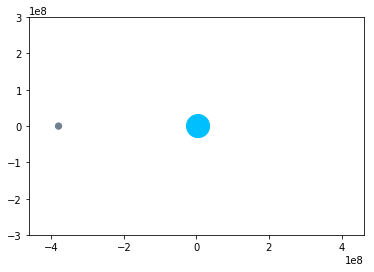

In [1]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt

G = 6.674e-11 # Newton's Gravitational Constant (m^3 / (kg s^2))
M = 5.974e24 # Mass of earth (kg)
Erad = 6.371e6 # Radius of earth (m)
mrad = 1.7374e6 # Radius of moon (m)
s = 5 # Scaling factor for visualizing relative size of earth/moon
m = 7.348e22 # mass of moon (kg)
w = 2.662e-6 # orbital angular frequency (s^-1)
R = 384.4e6 #Distance from earth to moon (m)

xm = -1*R/(1+m/M)
xE = R + xm

fig,ax = plt.subplots()
earth = plt.Circle((xE,0),radius = s*Erad, color = "deepskyblue")
moon = plt.Circle((xm,0),radius = s*mrad, color = "slategray")
ax.add_patch(earth)
ax.add_patch(moon)
ax.axis("equal")
ax.set_xlim([-1.2*R,1.2*R])
ax.set_ylim([-1.2*R,1.2*R])
plt.show()



- Add a contour plot of the effective gravitational potential $V$. Remember that
$$r = \sqrt{x^2 + y^2}\,,$$
$$r_E = \sqrt{(x-x_E)^2 + (y-y_E)^2}\,,$$
and
$$r_m = \sqrt{(x-x_m)^2 + (y-y_m)^2}\,.$$
> Hint: By default, most of the contours will end up tightly bunched near the earth and moon (where $V\rightarrow-\infty$). You can use the `levels` keyword argument to `pyplot.contour` to control where the contours are drawn.

Verify that your plot resembles the ones on Wikipedia.

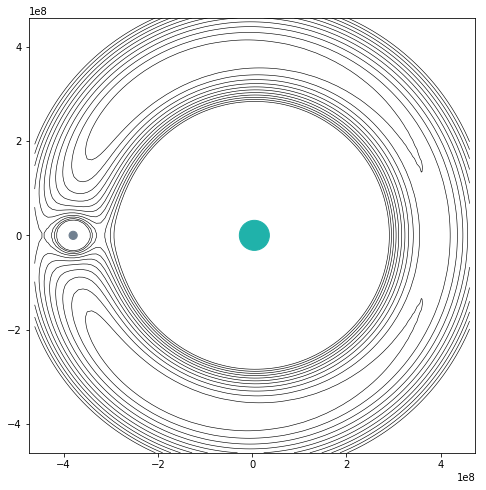

In [2]:
def Gravitational_Potential(x,y,xE,yE,xm,ym,G,M,m,w):
    V = -G*M/(np.sqrt((x-xE)**2 + (y-yE)**2)) - G*m/(np.sqrt((x-xm)**2 + (y-ym)**2)) - 0.5*(x**2+y**2)*w**2
    return(V)

x = np.linspace(-1.2*R,1.2*R,100)
y = np.linspace(-1.2*R,1.2*R,100)

xx,yy = np.meshgrid(x,y)

V = Gravitational_Potential(xx,yy,xE,0,xm,0,G,M,m,w)

fig,ax = plt.subplots(figsize = (8,8))
earth = plt.Circle((xE,0),radius = s*Erad, color = "lightseagreen")
moon = plt.Circle((xm,0),radius = s*mrad, color = "slategray")
ax.add_patch(earth)
ax.add_patch(moon)

cont_lines = np.linspace(-1.7e6,V.max(),12)
ax.contour(x,y,V,levels = cont_lines,colors = 'k',linestyles = "solid",linewidths = 0.6)

ax.axis("equal")
#ax.set_xlim([-1.2*R,1.2*R])
#ax.set_ylim([-1.2*R,1.2*R])

plt.show()







- The gravitation field is given by
$$\vec{F}=-\vec{\nabla}V\,.$$
The Lagrange points are located at five places where the magnitude of $F$ is zero. Calculate the gradient by hand and write a function for it. Use this function and the downhill simplex method to locate the five Lagrange points. Add them to your plot.
> Hint: Make sure to write your function in a form that works with `scipy.optimize.fmin`.

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 99
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 66
         Function evaluations: 110
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 74
         Function evaluations: 125
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 108
         Function evaluations: 207


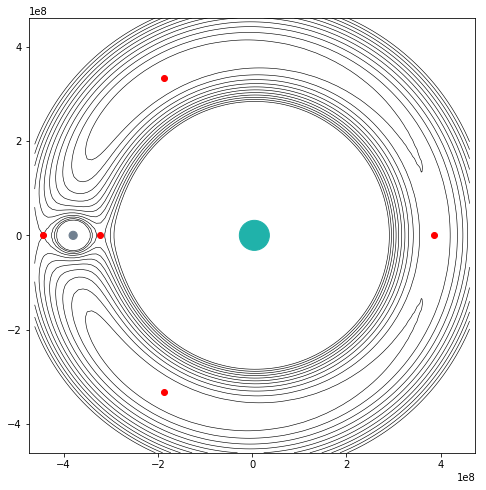

In [3]:
Fx = lambda x,y: (-G*M/((x-xE)**2 + (y-0)**2)**2)*(x-xE) - (G*m/((x-xm)**2 + (y-0)**2)**2)*(x-xm) + x*w**2 
Fy = lambda x,y: (-G*M/((x-xE)**2 + (y-0)**2)**2)*(y-0) - (G*m/((x-xm)**2 + (y-0)**2)**2)*(y-0) + y*w**2
Grav = lambda x,y: np.sqrt(Fx(x,y) + Fy(x,y))

def Grav(xy):
    x,y = xy
    G = 6.674e-11 # Newton's Gravitational Constant (m^3 / (kg s^2))
    M = 5.974e24 # Mass of earth (kg)
    m = 7.348e22 # mass of moon (kg)
    w = 2.662e-6 # orbital angular frequency (s^-1)
    R = 384.4e6 #Distance from earth to moon (m)
    xm = -1*R/(1+m/M)
    ym = 0
    xE = R + xm
    yE = 0
    
    rE = np.sqrt((x-xE)**2 + (y-yE)**2)
    rm = np.sqrt((x-xm)**2 + (y-ym)**2)
    
    Fx = -G*M/rE**3*(x-xE) - G*m/rm**3*(x-xm) + x*w**2
    Fy = -G*M/rE**3*(y-yE) - G*m/rm**3*(y-ym) + y*w**2
    g = np.sqrt(Fx**2 + Fy**2)
    return(g)

guessL1 = (-3e8,0)
xL1,yL1 = so.fmin(Grav,guessL1)
guessL2 = (-4.2e8,0)
xL2,yL2 = so.fmin(Grav,guessL2)
guessL3 = (3.9e8,0)
xL3,yL3 = so.fmin(Grav,guessL3)
guessL4 = (-2e8,3e8)
xL4,yL4 = so.fmin(Grav,guessL4)
guessL5 = (-2e8,-3e8)
xL5,yL5 = so.fmin(Grav,guessL5)

fig,ax = plt.subplots(figsize = (8,8))
earth = plt.Circle((xE,0),radius = s*Erad, color = "lightseagreen")
moon = plt.Circle((xm,0),radius = s*mrad, color = "slategray")
ax.add_patch(earth)
ax.add_patch(moon)

ax.plot(xL1,yL1,'ro',xL2,yL2,'ro',xL3,yL3,'ro',xL4,yL4,'ro',xL5,yL5,'ro')

cont_lines = np.linspace(-1.7e6,V.max(),12)
ax.contour(x,y,V,levels = cont_lines,colors = 'k',linestyles = "solid",linewidths = 0.6)

ax.axis("equal")

plt.show()
